In [1]:
#Importacion ded librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("../Datos/student_scores.csv", sep = ",")
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<AxesSubplot:xlabel='Hours'>

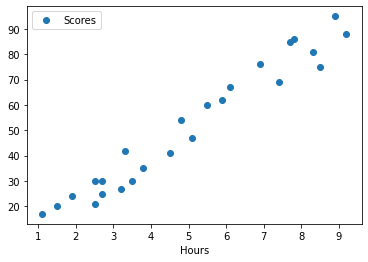

In [3]:
dataset.plot(x='Hours', y='Scores', style="o")

In [34]:
X = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values
X = X.reshape(-1,1)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
regressor.coef_

array([9.91065648])

In [39]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [38]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [40]:
#Convertimos en df la salida
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [41]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


In [42]:
dataset = pd.read_csv("../Datos/petrol_consumption.csv", sep = ",")

In [46]:
#Preparación de datos
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [50]:
X_test

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
29,9.0,3601,4650,0.493
4,8.0,4399,431,0.544
26,8.0,3448,5399,0.548
30,7.0,3640,6905,0.518
32,8.0,3063,6524,0.578
37,7.0,3897,6385,0.586
34,8.0,3528,3495,0.487
40,7.0,4449,4639,0.626
7,8.0,5126,2138,0.553
10,8.0,4391,5939,0.530


In [53]:
y_pred = regressor.predict(X_test)
y_pred

array([469.39198872, 545.64546431, 589.66839402, 569.7304133 ,
       649.77480909, 646.63116356, 511.60814841, 672.47517717,
       502.07478157, 501.2707342 ])

In [52]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.822247478964684
Mean Squared Error: 4666.344787588363
Root Mean Squared Error: 68.3106491521517


In [56]:
from sklearn.datasets import load_boston 
boston = load_boston()

/usr/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :f

In [57]:
X = boston.data #data
y = boston.target #características

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [63]:
print(regressor.intercept_)

38.09169492630212


In [64]:
print(regressor.coef_)

[-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]


In [65]:
y_pred = regressor.predict(X_test)
y_pred

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254,
       19.2834443 , 20.49647539, 21.36099298, 18.8967118 , 19.9280658 ,
        5.12703513, 16.3867396 , 17.07776485,  5.59375659, 39.99636726,
       32.49654668, 22.45798809, 36.85192327, 30.86401089, 23.15140009,
       24.77495789, 24.67187756, 20.59543752, 30.35369168, 22.41940736,
       10.23266565, 17.64816865, 18.27419652, 35.53362541, 20.96084724,
       18.30413012, 17.79262072, 19.96561663, 24.06127231, 29.10204874,
       19.27774123, 11.15536648, 24.57560579, 17.5862644 , 15.49454112,
       26.20577527, 20.86304693, 22.31460516, 15.60710156, 23.00363104,
       25.17247952, 20.11459464, 22.90256276, 10.0380507 , 24.28515123,
       20.94127711, 17.35258791, 24.52235405, 29.95143046, 13.42695877,
       21.72673066, 20.7897053 , 15.49668805, 13.98982601, 22.18377874,
       17.73047814, 21.58869165, 32.90522136, 31.11235671, 17.73252635,
       32.76358681, 18.7124637 , 19.78693475, 19.02958927, 22.89

In [66]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,22.6,24.889638
1,50.0,23.721411
2,23.0,29.364999
3,8.3,12.122386
4,21.2,21.443823
...,...,...
97,24.7,25.442171
98,14.1,15.571783
99,18.7,17.937195
100,28.1,25.305888


In [67]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.8429092204444952
Mean Squared Error: 33.448979997676474
Root Mean Squared Error: 5.78350931508513


In [82]:
automobile_df = automobile_df.replace('?', np.nan)
automobile_df = automobile_df.dropna()
automobile_df.shape

(392, 9)

In [83]:
automobile_df.drop(['origin', 'car name'], axis=1, inplace=True)

In [84]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
107,18.0,6,232.0,100,2789,15.0,73
314,26.4,4,140.0,88,2870,18.1,80
99,18.0,6,232.0,100,2945,16.0,73
320,37.0,4,119.0,92,2434,15.0,80
46,22.0,4,140.0,72,2408,19.0,71


In [85]:
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)

In [86]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
237,30.5,4,98.0,63,2051,17.0,1977
54,35.0,4,72.0,69,1613,18.0,1971
0,18.0,8,307.0,130,3504,12.0,1970
240,30.5,4,97.0,78,2190,14.1,1977
333,32.7,6,168.0,132,2910,11.4,1980


In [88]:
import datetime
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])

In [89]:
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,age
0,18.0,8,307.0,130,3504,12.0,1970,52
1,15.0,8,350.0,165,3693,11.5,1970,52
2,18.0,8,318.0,150,3436,11.0,1970,52
3,16.0,8,304.0,150,3433,12.0,1970,52
4,17.0,8,302.0,140,3449,10.5,1970,52


In [90]:
automobile_df.drop(['model year'], axis=1, inplace=True)

In [91]:
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')

Text(0, 0.5, 'Millas por galon')

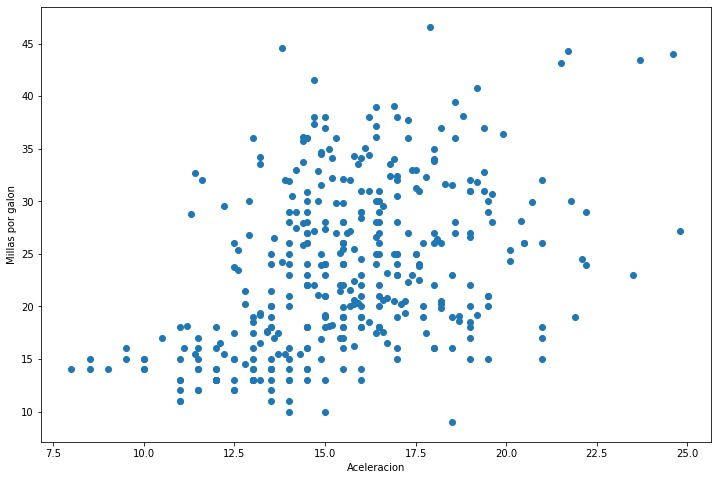

In [92]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['acceleration'], automobile_df['mpg'])

plt.xlabel('Aceleracion')
plt.ylabel('Millas por galon')

Text(0, 0.5, 'Millas por galon')

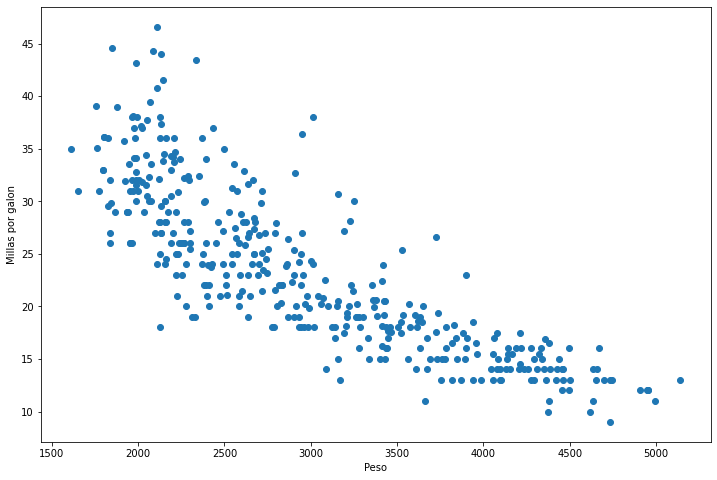

In [93]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['weight'], automobile_df['mpg'])

plt.xlabel('Peso')
plt.ylabel('Millas por galon')

Text(0, 0.5, 'Millas por galon')

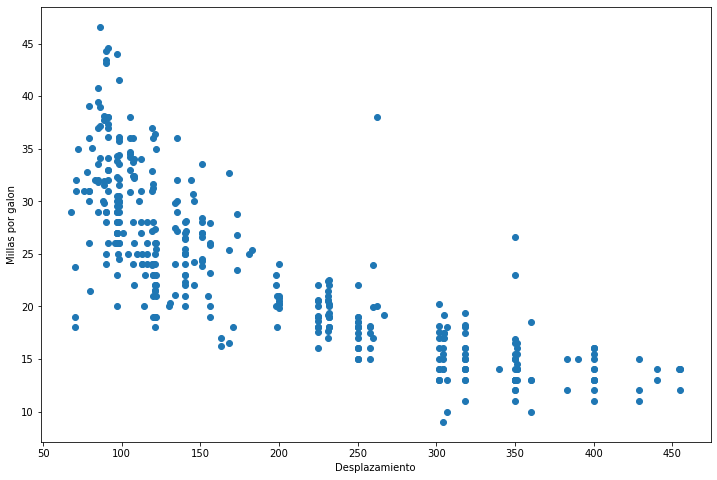

In [94]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['displacement'], automobile_df['mpg'])

plt.xlabel('Desplazamiento')
plt.ylabel('Millas por galon')

In [97]:
#Analisis de Correlaciones
automobile_corr = automobile_df.corr()
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


<AxesSubplot:>

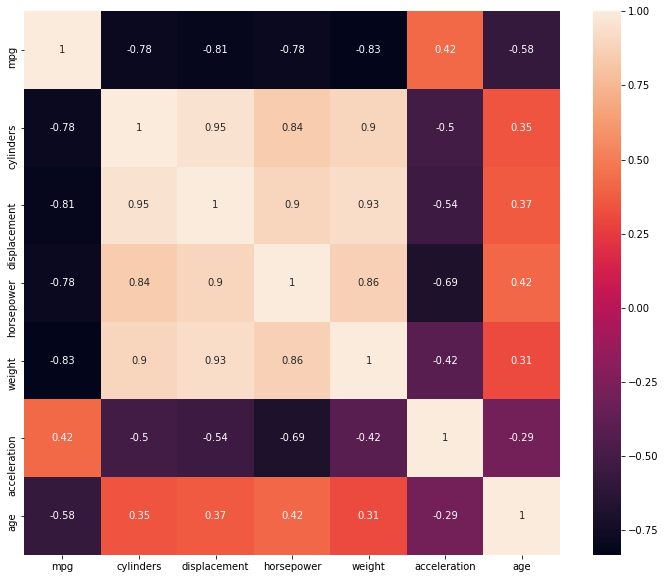

In [98]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(automobile_corr, annot=True)

Text(0, 0.5, 'lon')

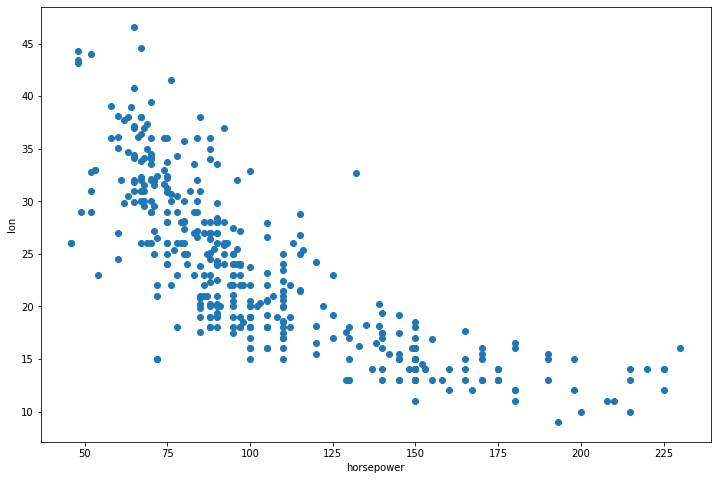

In [99]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['horsepower'], automobile_df['mpg'])

plt.xlabel('horsepower')
plt.ylabel('lon')

In [104]:

X = automobile_df[['horsepower']]
y = automobile_df['mpg']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
linear_model = make_pipeline(StandardScaler(with_mean=False),
                            LinearRegression())

linear_model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [107]:
print('Puntaje Entrenamiento: ', linear_model.score(X_train, y_train))

Puntaje Entrenamiento:  0.6111974156641884


In [108]:
y_pred = linear_model.predict(X_test)

In [109]:
from sklearn.metrics import r2_score

print('Puntaje Testing: ', r2_score(y_test, y_pred))

Puntaje Testing:  0.5546978894189252


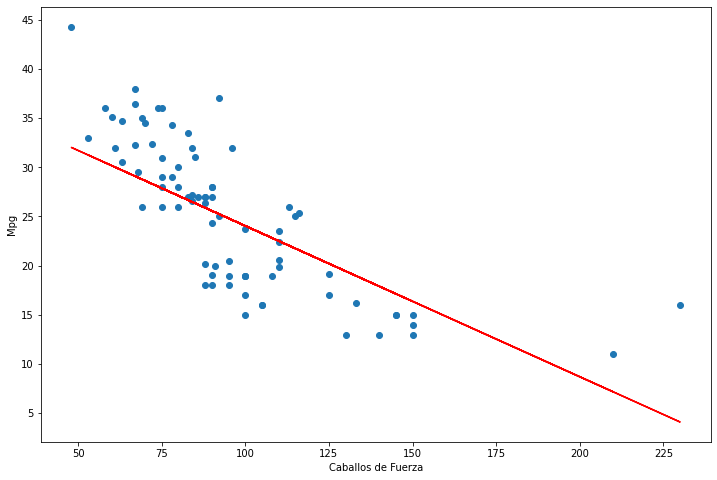

In [111]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='r')

plt.xlabel('Caballos de Fuerza')
plt.ylabel('Mpg')
plt.show()

In [112]:
#Regresion lineal con age
X = automobile_df[['age']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
linear_model.fit(x_train, y_train)

print('Puntaje de entrenamiento: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Puntaje de Testing: ', r2_score(y_test, y_pred))

Puntaje de entrenamiento:  0.35681381241678234
Puntaje de Testing:  0.2429178836968735


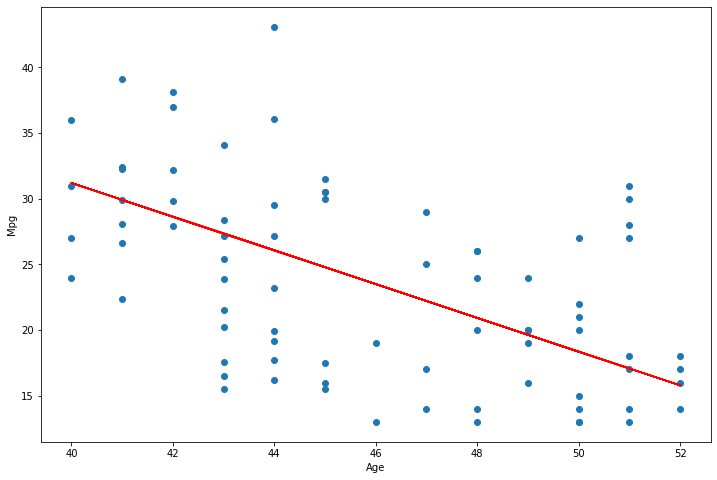

In [113]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show()

In [114]:
X = automobile_df[['displacement', 'horsepower', 'weight']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [115]:
linear_model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [116]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.6913914730473805


In [117]:
#Carga de datos
file = 'https://raw.githubusercontent.com/fhernanb/Python-para-estadistica/master/03%20Regression/Regresi%C3%B3n%20lineal%20simple/softdrink.csv'
df = pd.read_csv(file)

In [118]:
import pandas as pd                         
import statsmodels.api as sm               
import statsmodels.formula.api as smf      
import matplotlib.pyplot as plt 


In [119]:
df.head()

,Obs,y,x1,x2
0,1,16.68,7,560
1,2,11.50,3,220
2,3,12.03,3,340
3,4,14.88,4,80
4,5,13.75,6,150


In [125]:
X = df["x1"] 
X = sm.add_constant(X)
y = df["y"] 
mod1 = sm.OLS(y, X).fit()   
predictions = mod1.predict(X)

In [126]:
mod1.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     307.8
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           8.22e-15
Time:                        22:52:56   Log-Likelihood:                -70.197
No. Observations:                  25   AIC:                             144.4
Df Residuals:                      23   BIC:                             146.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3208      1.371      2.422      0.024       0.484       6.157
x1             2.1762      0.124     17.546      0.000       1.920       2.433
==============================================================================
Omnibus:                        2.383   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                1.037
Skew:                           0.388   Prob(JB):                        0.595
Kurtosis:                       3.627   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
mod2 = smf.ols('y ~ x1', data=df).fit()

In [128]:
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     307.8
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           8.22e-15
Time:                        22:54:57   Log-Likelihood:                -70.197
No. Observations:                  25   AIC:                             144.4
Df Residuals:                      23   BIC:                             146.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3208      1.371      2.422      0.0

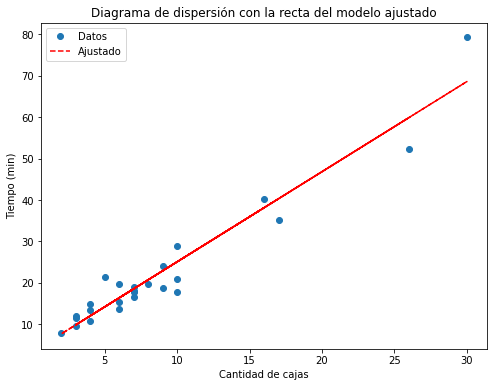

In [134]:
#Recta de regresion estimada
fig, ax = plt.subplots(figsize=(8,6))                                    # Ajuste del gráfico
ax.plot(df["x1"] , df["y"] , 'o', label="Datos")                         # Ajuste para las etiquetas del gráfico
ax.plot(df["x1"], mod2.fittedvalues, 'r--', label="Ajustado")           # Ajuste para las etiquetas del gráfico
legend = ax.legend(loc="best")                                           # Ajustes para las leyendas del gráfico
plt.xlabel('Cantidad de cajas')                                          # Etiqueta del eje X
plt.ylabel('Tiempo (min)')                                               # Etiqueta del eje Y
plt.title('Diagrama de dispersión con la recta del modelo ajustado');  